In [307]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings 
from PIL import Image

warnings.simplefilter("ignore")
plt.rcParams["figure.figsize"] = (8,5)

In [308]:
df = pd.read_csv("owid-covid-data.csv")

In [309]:
df['ration_people_vaccinated'] = df['people_vaccinated'] / df['population']
df['ratio_people_full_vaccinated'] = df['people_fully_vaccinated'] / df['population']

In [310]:
columns = ['date', 'location', 'population', 'people_fully_vaccinated']
#df_brasil = df[columns][ (~df['people_fully_vaccinated'].isnull()) ]
df_brasil = df[ (df['location'] == 'Brazil')  ][columns]

In [311]:
df_brasil

,date,location,population,people_fully_vaccinated
16214,2020-02-26,Brazil,213993441.0,NaN
16215,2020-02-27,Brazil,213993441.0,NaN
16216,2020-02-28,Brazil,213993441.0,NaN
16217,2020-02-29,Brazil,213993441.0,NaN
16218,2020-03-01,Brazil,213993441.0,NaN
...,...,...,...,...
16823,2021-10-27,Brazil,213993441.0,118280562.0
16824,2021-10-28,Brazil,213993441.0,NaN
16825,2021-10-29,Brazil,213993441.0,NaN
16826,2021-10-30,Brazil,213993441.0,NaN


In [312]:
# Busca data inicial da vacinacao
min_date_vaccinated = df_brasil[~df_brasil.people_fully_vaccinated.isnull()].date.min()
max_date_vaccinated = df_brasil[~df_brasil.people_fully_vaccinated.isnull()].date.max()

In [313]:
print(f"Min Date : {min_date_vaccinated}, Max Date : {max_date_vaccinated}")

Min Date : 2021-02-06, Max Date : 2021-10-27


In [314]:
df_brasil = df_brasil[ (df_brasil['date'] >= min_date_vaccinated) & (df_brasil['date'] <= max_date_vaccinated) ]

In [315]:
df_brasil['date'] = pd.to_datetime(df_brasil["date"])

In [316]:
df_brasil

,date,location,population,people_fully_vaccinated
16560,2021-02-06,Brazil,213993441.0,1962.0
16561,2021-02-07,Brazil,213993441.0,19677.0
16562,2021-02-08,Brazil,213993441.0,25688.0
16563,2021-02-09,Brazil,213993441.0,33616.0
16564,2021-02-10,Brazil,213993441.0,50655.0
...,...,...,...,...
16819,2021-10-23,Brazil,213993441.0,114767275.0
16820,2021-10-24,Brazil,213993441.0,115489354.0
16821,2021-10-25,Brazil,213993441.0,NaN
16822,2021-10-26,Brazil,213993441.0,116192968.0


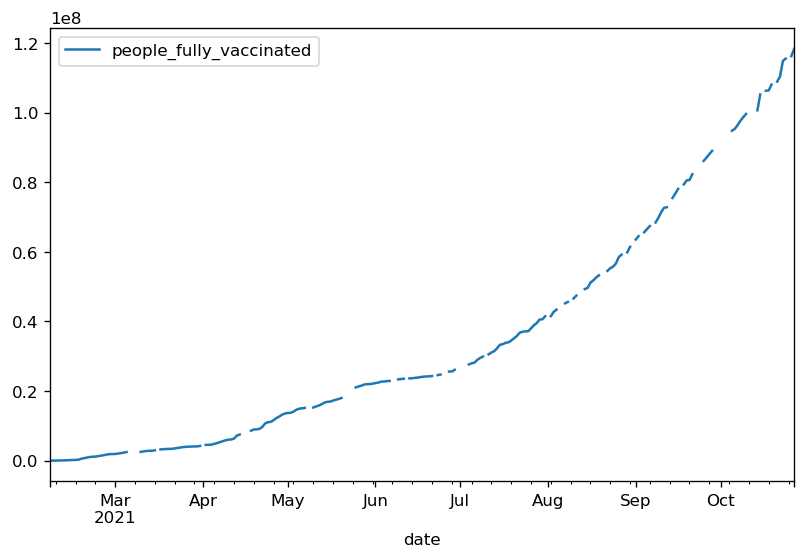

In [317]:
# Os dados seguem uma tendência linear no tempo, e como podemos observar abaixo, falta dados para alguns dias 
df_brasil[["date", "people_fully_vaccinated"]].plot(x="date")

In [12]:
## Nesse caso, precisaremos preencher esses pontos de dados faltantes

In [318]:
df_brasil.people_fully_vaccinated.interpolate(method="linear", inplace=True)

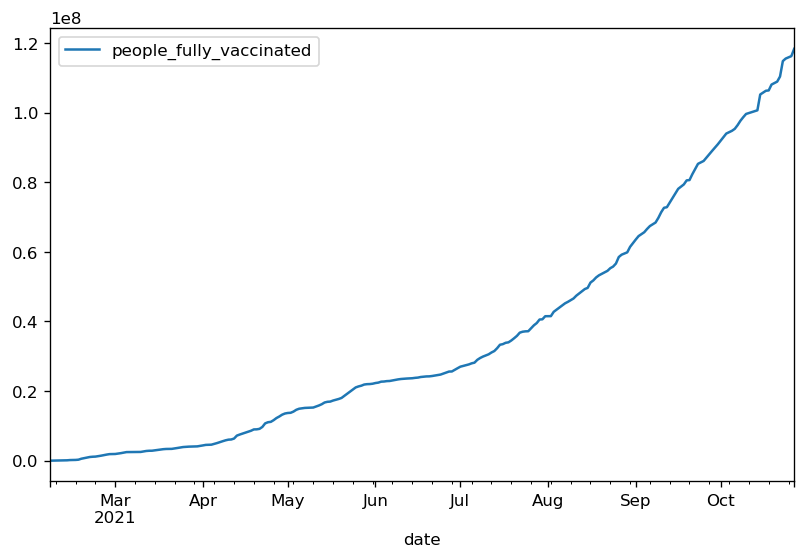

In [319]:
df_brasil[["date", "people_fully_vaccinated"]].plot(x="date")

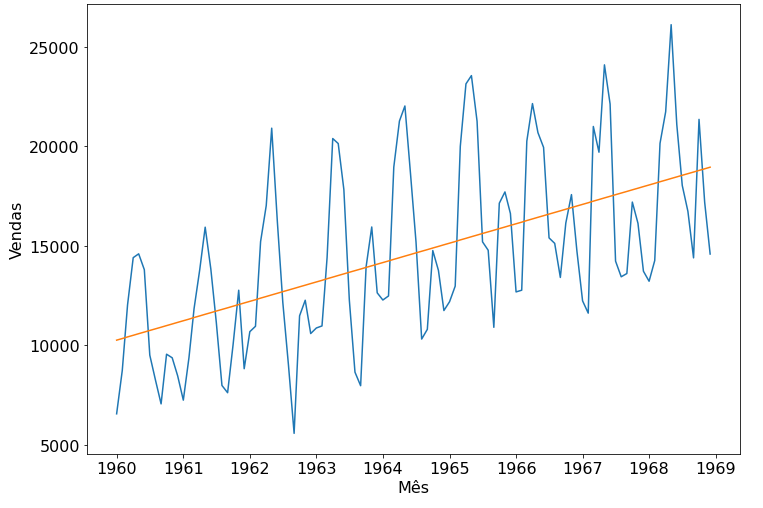

In [15]:
# Série com sazionalidade
Image.open("serie_sazional_exemplo.png")

In [16]:
# Sazionalidade dia a dia

In [320]:
fig = px.line(df_brasil, x="date", y="people_fully_vaccinated", color="location")
fig.show()

In [18]:
# Sazionalidade mes a mes

In [321]:
columns = ['date', 'date_month', 'location', 'people_fully_vaccinated', 'population']
df_brasil['date_month'] = pd.to_datetime(df_brasil['date']).dt.strftime('%Y%m') + '01'
df_brasil['date_month'] = pd.to_datetime(df_brasil.loc[df_brasil['date_month'].str[-2:] != '13','date_month'], format='%Y%m%d', errors='coerce')

df_time_series = df_brasil[columns].groupby(['location', 'population', 'date_month']).max().reset_index()

In [322]:
df_time_series = df_time_series[['date_month', 'people_fully_vaccinated', 'location']]

In [323]:
fig = px.line(df_time_series, x="date_month", y="people_fully_vaccinated", color="location")
fig.show()

In [324]:
# Converte a coluna date pada DateTimeIndex
df_brasil.set_index(pd.DatetimeIndex(df_brasil['date']), inplace= True)
df_brasil.drop("date", axis=1, inplace=True)

In [325]:
df_brasil.sort_index(inplace= True)
df_brasil.iloc[0:10]

,location,population,people_fully_vaccinated,date_month
date,,,,
2021-02-06,Brazil,213993441.0,1962.0,2021-02-01
2021-02-07,Brazil,213993441.0,19677.0,2021-02-01
2021-02-08,Brazil,213993441.0,25688.0,2021-02-01
2021-02-09,Brazil,213993441.0,33616.0,2021-02-01
2021-02-10,Brazil,213993441.0,50655.0,2021-02-01
2021-02-11,Brazil,213993441.0,80760.0,2021-02-01
2021-02-12,Brazil,213993441.0,109866.0,2021-02-01
2021-02-13,Brazil,213993441.0,178468.0,2021-02-01
2021-02-14,Brazil,213993441.0,194230.0,2021-02-01


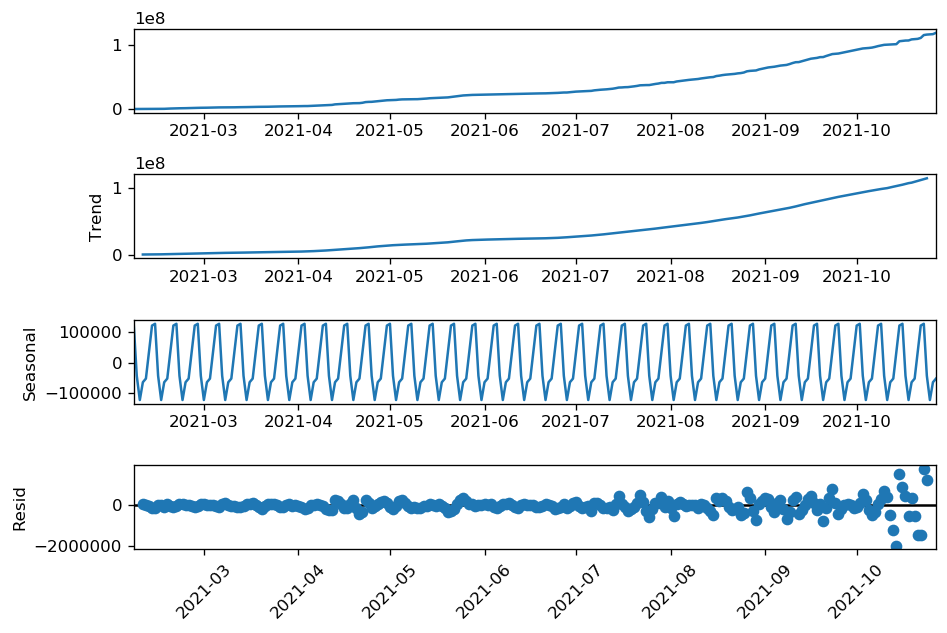

In [326]:
from statsmodels.tsa.seasonal import seasonal_decompose

df_brasil.sort_index(inplace= True)

series = df_brasil[["people_fully_vaccinated"]]#.iloc[0:14]
result = seasonal_decompose(series, model="additive")

result.plot()
plt.xticks(rotation=45);

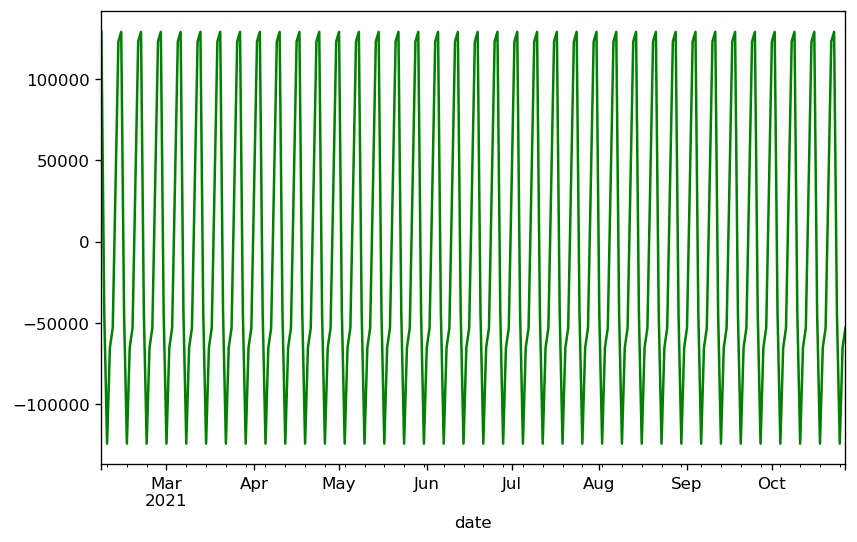

In [327]:
seasonality = result.seasonal
seasonality.plot(color='green')

In [345]:
result.seasonal.iloc[0:10]

date
2021-02-06    128820.796851
2021-02-07    -43857.620652
2021-02-08   -124131.495649
2021-02-09    -65166.319237
2021-02-10    -53042.021424
2021-02-11     34482.235976
2021-02-12    122894.424135
2021-02-13    128820.796851
2021-02-14    -43857.620652
2021-02-15   -124131.495649
Name: seasonal, dtype: float64

In [26]:
## Teste estatístico de adfulllher para verificar se a série é estacionaria.

In [281]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_brasil.people_fully_vaccinated)
print('Estátistica ADF: %f' % result[0])
print('p-value: %f' % result[1])

Estátistica ADF: 2.739754
p-value: 0.999088


In [ ]:
## Teste estatístico com diferenciação para verificar se a série é estacionaria.

In [346]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_brasil.people_fully_vaccinated.diff().dropna())
print('Estátistica ADF: %f' % result[0])
print('p-value: %f' % result[1])

Estátistica ADF: -0.012372
p-value: 0.957497


In [339]:
df_brasil.people_fully_vaccinated.resample('D').mean()#.plot()

date
2021-02-06         1962.0
2021-02-07        19677.0
2021-02-08        25688.0
2021-02-09        33616.0
2021-02-10        50655.0
                 ...     
2021-10-23    114767275.0
2021-10-24    115489354.0
2021-10-25    115841161.0
2021-10-26    116192968.0
2021-10-27    118280562.0
Freq: D, Name: people_fully_vaccinated, Length: 264, dtype: float64

In [28]:
# Com o p-value = 0.99 que é maior que 0,05, não rejeitamos a hipótese nula e confirma que a série não está estacionária.

In [359]:
# Procurando os parametros p, q e d

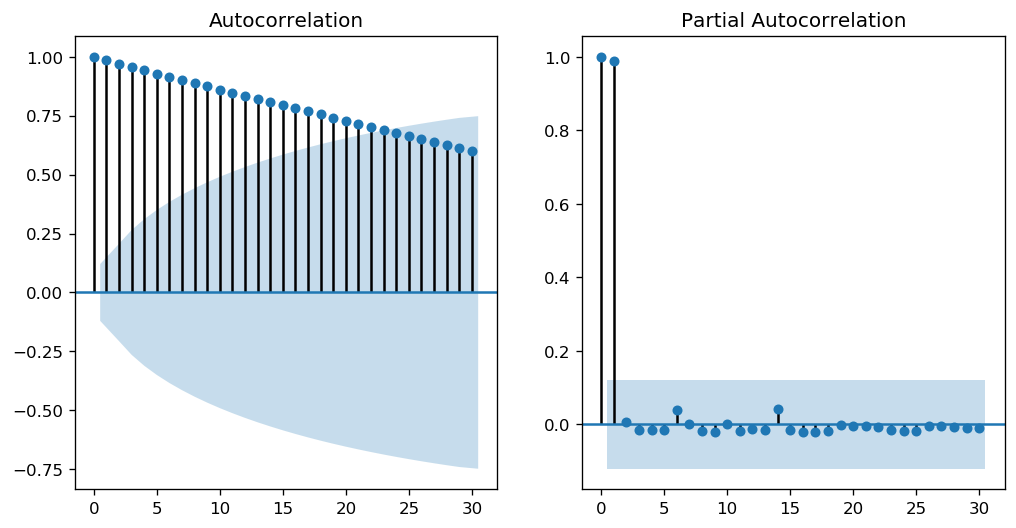

In [329]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

fig, ax = plt.subplots(1,2,figsize=(10,5))
sm.graphics.tsa.plot_acf(df_brasil.people_fully_vaccinated.squeeze(), lags=30, ax=ax[0])
sm.graphics.tsa.plot_pacf(df_brasil.people_fully_vaccinated.squeeze(), lags=30, ax=ax[1])
plt.show()

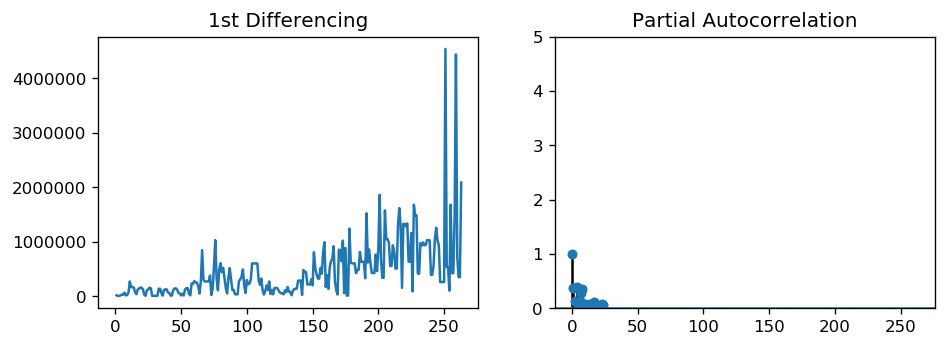

In [358]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df_brasil.reset_index().people_fully_vaccinated.diff()); 
axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df_brasil.people_fully_vaccinated.diff().dropna(), ax=axes[1])

plt.show()

In [275]:
df_brasil.reset_index().people_fully_vaccinated.diff().diff()

0            NaN
1            NaN
2       -11704.0
3         1917.0
4         9111.0
         ...    
259    2982282.0
260   -3716029.0
261    -370272.0
262          0.0
263    1735787.0
Name: people_fully_vaccinated, Length: 264, dtype: float64

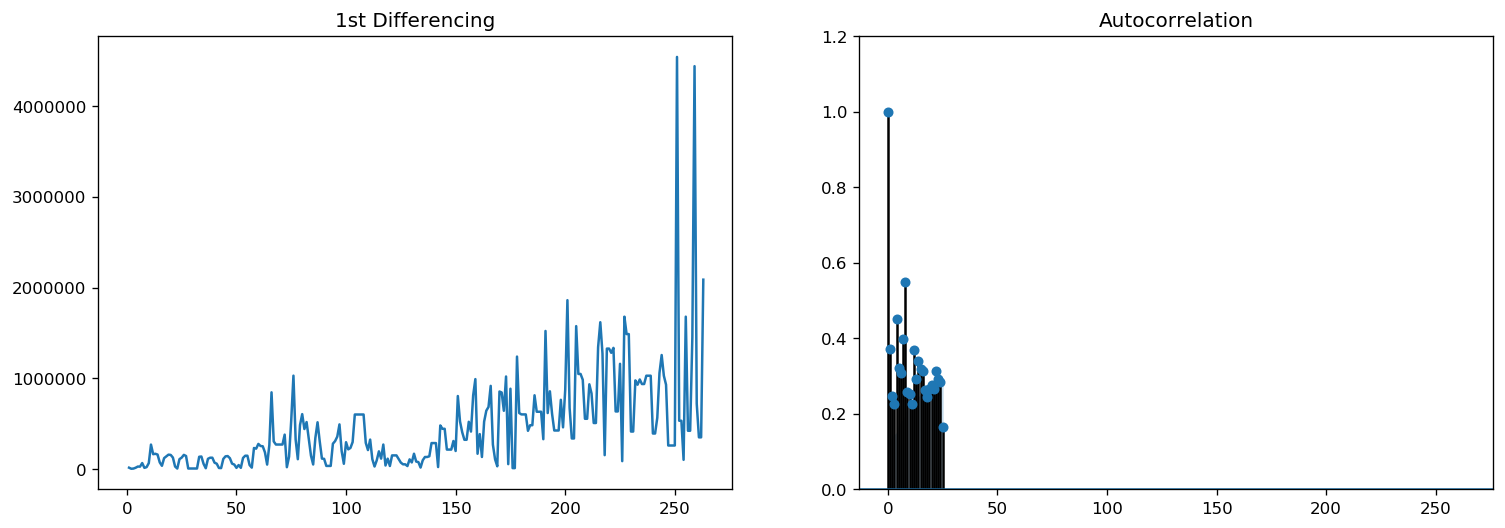

In [267]:
plt.rcParams.update({'figure.figsize':(15,5), 'figure.dpi':120})
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df_brasil.reset_index().people_fully_vaccinated.diff()); 
axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df_brasil.reset_index().people_fully_vaccinated.diff().dropna(), ax=axes[1])

plt.show()

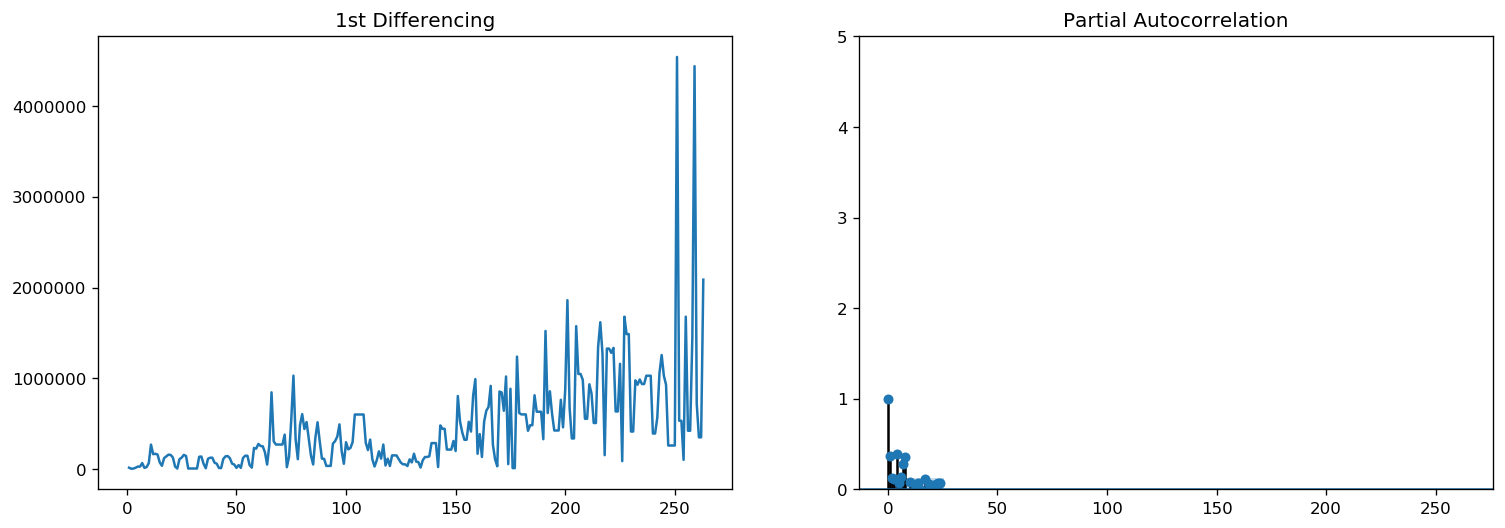

In [268]:
plt.rcParams.update({'figure.figsize':(15,5), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df_brasil.reset_index().people_fully_vaccinated.diff()); 
axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df_brasil.reset_index().people_fully_vaccinated.diff().dropna(), ax=axes[1])

plt.show()

In [364]:
new_df = df_brasil.reset_index().people_fully_vaccinated 

In [366]:
new_df

0      0.000009
1      0.000092
2      0.000120
3      0.000157
4      0.000237
         ...   
259    0.536312
260    0.539686
261    0.541330
262    0.542974
263    0.552730
Length: 264, dtype: float64

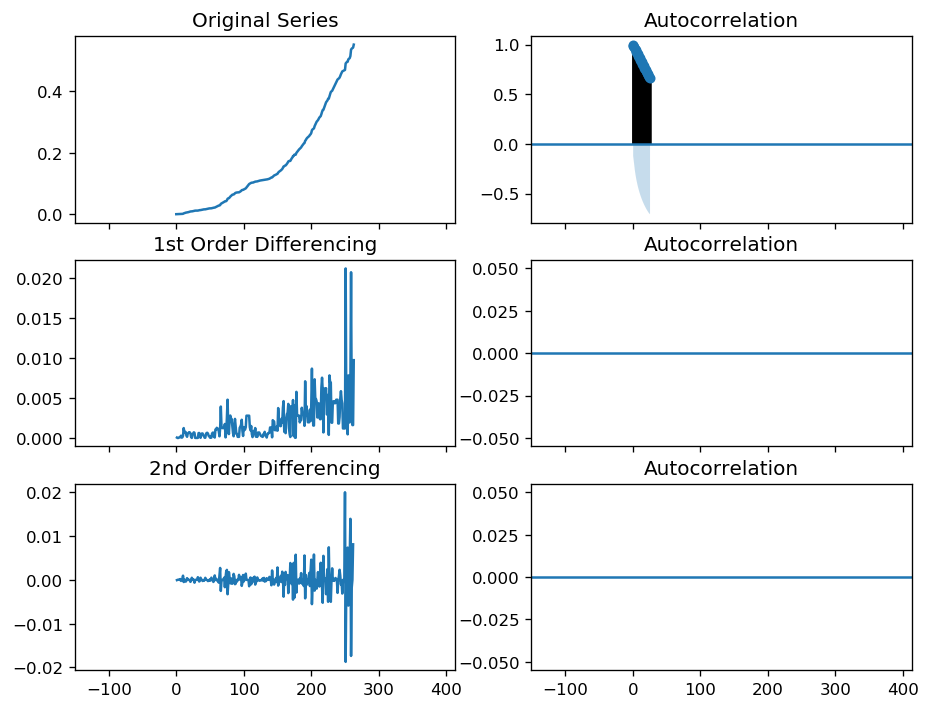

In [365]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(new_df); axes[0, 0].set_title('Original Series')
plot_acf(new_df, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(new_df.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(new_df.diff(), ax=axes[1, 1])
diffval = new_df.diff()

# 2nd Differencing
axes[2, 0].plot(np.diff(diffval)); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(np.diff(diffval), ax=axes[2, 1])
plt.show()

In [30]:
#Split Data
size_train = round((df_brasil.people_fully_vaccinated.shape[0] * 0.9))

# Create Training and Test
df_train = df_brasil[0:size_train]
df_test = df_brasil[size_train:]

train = df_train.people_fully_vaccinated
test = df_test.people_fully_vaccinated

In [31]:
train.shape, test.shape

((238,), (26,))

In [395]:
model=sm.tsa.statespace.SARIMAX(train, 
                                model='additive', 
                                freq='D', 
                                order=(1, 1, 3), seasonal_order=(0, 1, 2, 12),
                                trend='t')


results=model.fit()

#model = ARIMA(train, freq='D', order=(5,1,2))
#results = model.fit()

In [396]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                 people_fully_vaccinated   No. Observations:                  238
Model:             SARIMAX(1, 1, 3)x(0, 1, [1, 2], 12)   Log Likelihood               -3156.341
Date:                                 Fri, 05 Nov 2021   AIC                           6328.682
Time:                                         08:29:27   BIC                           6356.011
Sample:                                     02-06-2021   HQIC                          6339.712
                                          - 10-01-2021                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift        375.6966   3476.945      0.108      0.914   -6438.990    7190.383
ar.L1          0.0456      8.875      0.005      0.996     -17.350      17.441
ma.L1          0.2015      8.879      0.023      0.982     -17.200      17.603
ma.L2         -0.0809      2.186     -0.037      0.970      -4.366       4.204
ma.L3          0.0127      0.662      0.019      0.985      -1.285       1.310
ma.S.L12      -0.7370      0.102     -7.230      0.000      -0.937      -0.537
ma.S.L24      -0.1023      0.117     -0.875      0.382      -0.331       0.127
sigma2      1.239e+11      0.000   7.62e+14      0.000    1.24e+11    1.24e+11
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                53.27
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               6.11   Skew:                             0.66
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.48e+30. Standard errors may be unstable.
"""

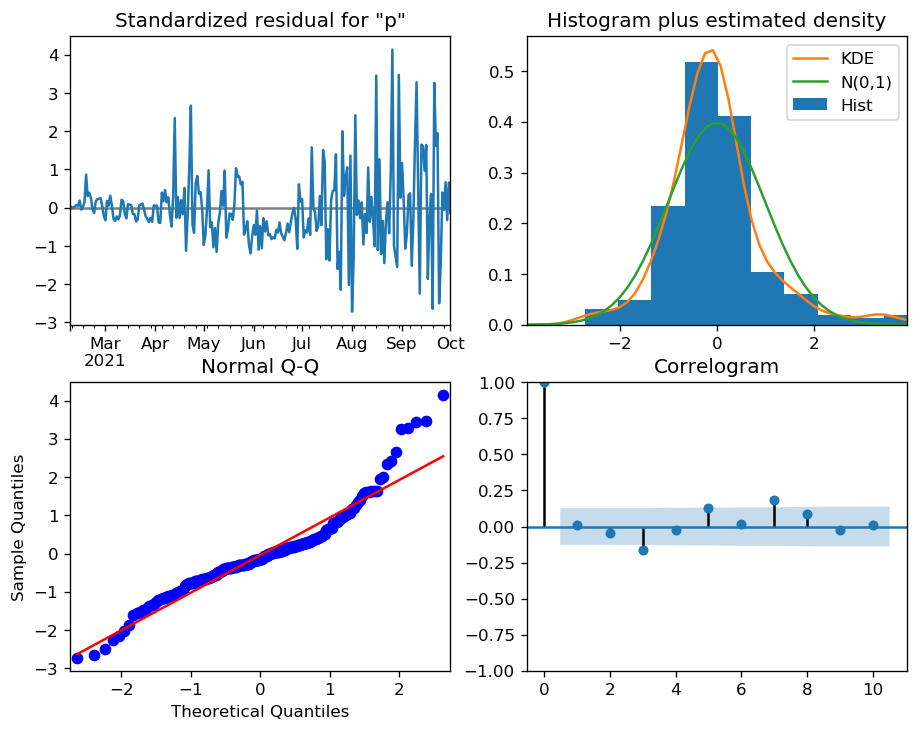

In [370]:
results.plot_diagnostics();

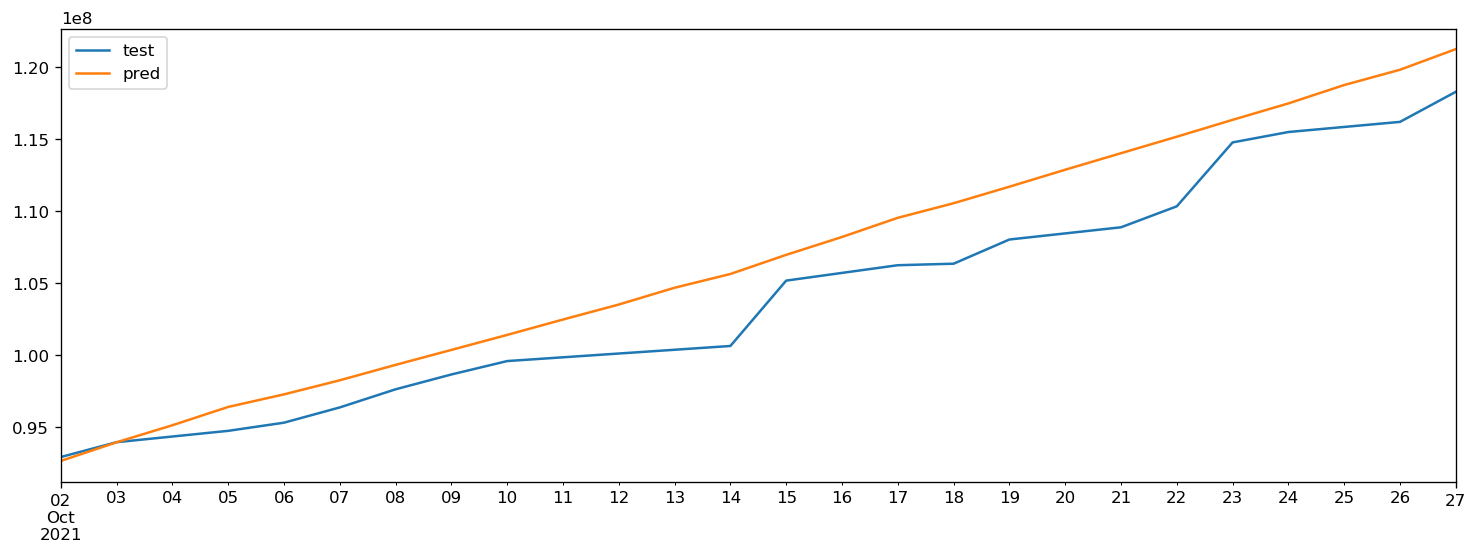

In [351]:
#results.plot_predict(dynamic=False);
pred = results.predict(test.index.min(), test.index.max()).apply(lambda x: "{:.0f}".format(x))

pd.DataFrame({"test": test.apply(lambda x: "{:.0f}".format(x)), "pred": pred}).astype(float).plot(figsize=(15, 5))


In [352]:
pd.DataFrame({"test": test.apply(lambda x: "{:.0f}".format(x)), "pred": fc}).astype(float)

,test,pred
2021-10-02,92921255.0,92691766.0
2021-10-03,93951410.0,93495663.0
2021-10-04,94345309.0,94302791.0
2021-10-05,94739208.0,95113147.0
2021-10-06,95306373.0,95926731.0
2021-10-07,96366335.0,96743542.0
2021-10-08,97624430.0,97563579.0
2021-10-09,98653914.0,98386841.0
2021-10-10,99584719.0,99213326.0
2021-10-11,99846560.0,100043034.0


In [100]:
dd = pd.concat([train.apply(lambda x: "{:.0f}".format(x)).astype(float), pred.astype(float)])

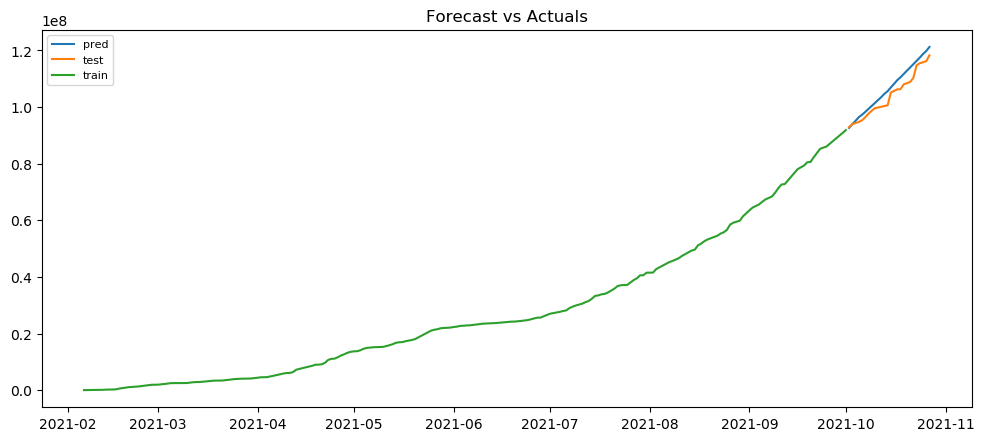

In [353]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(pred.astype(float), label='pred')
plt.plot(test, label='test')
plt.plot(train, label='train')
#plt.fill_between(lower.index, lower, upper, 
#                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [354]:
days = 0
taxa = 0
while True:
    days = days + 1
    
    date_range = pd.date_range(start=test.index.max(), end=test.index.max() + pd.Timedelta(str(days)+" days"))
    re = results.predict(date_range.min(), date_range.max()).apply(lambda x: "{:.0f}".format(x))
    
    taxa = pd.concat([train, test, re]).astype(float) / df_brasil['population'].unique()
    
    if taxa.max() > 0.8:
        break
    
    print("Numero de dias:", days, " Data:", taxa.index.max(), " Taxa:", taxa.max(), "populacao totalmente vacinada:", re.max())

Numero de dias: 1  Data: 2021-10-28 00:00:00  Taxa: 0.5728648197212736 populacao totalmente vacinada: 122589314
Numero de dias: 2  Data: 2021-10-29 00:00:00  Taxa: 0.5795723570798602 populacao totalmente vacinada: 124024683
Numero de dias: 3  Data: 2021-10-30 00:00:00  Taxa: 0.5847926292282949 populacao totalmente vacinada: 125141787
Numero de dias: 4  Data: 2021-10-31 00:00:00  Taxa: 0.5906469441743311 populacao totalmente vacinada: 126394572
Numero de dias: 5  Data: 2021-11-01 00:00:00  Taxa: 0.5966476094003274 populacao totalmente vacinada: 127678675
Numero de dias: 6  Data: 2021-11-02 00:00:00  Taxa: 0.6025023776312846 populacao totalmente vacinada: 128931557
Numero de dias: 7  Data: 2021-11-03 00:00:00  Taxa: 0.608355944890853 populacao totalmente vacinada: 130184182
Numero de dias: 8  Data: 2021-11-04 00:00:00  Taxa: 0.6143218426961039 populacao totalmente vacinada: 131460845
Numero de dias: 9  Data: 2021-11-05 00:00:00  Taxa: 0.6201550308263888 populacao totalmente vacinada: 132

In [397]:
smodel = pm.auto_arima(train, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=6345.128, Time=1.07 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=6409.263, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=6361.659, Time=0.36 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=6344.207, Time=0.36 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=6392.224, Time=0.13 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=6346.179, Time=0.58 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=6346.163, Time=1.05 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=6358.714, Time=0.29 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=6346.991, Time=4.36 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=6366.751, Time=0.20 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=6345.264, Time=0.70 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=6345.162, Time=0.41 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=6344.286, Time=1.92 sec
 ARIMA(0,1,1)(0,1,1)[12] intercept   : AIC=6332.905, Time=0.52 sec
 ARIMA(0,1,1)(0,1,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  238
Model:             SARIMAX(0, 1, 2)x(0, 1, [1], 12)   Log Likelihood               -3161.154
Date:                              Fri, 05 Nov 2021   AIC                           6332.308
Time:                                      08:32:18   BIC                           6349.388
Sample:                                           0   HQIC                          6339.202
                                              - 238                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   4.058e+04   1.06e+04      3.828      0.000    1.98e+04    6.14e+04
ma.L1          0.3066      0.072      4.273      0.000       0.166       0.447
ma.L2         -0.0105      0.073     -0.144      0.886      -0.154       0.133
ma.S.L12      -0.7205      0.074     -9.725      0.000      -0.866      -0.575
sigma2      1.248e+11      0.006   2.17e+13      0.000    1.25e+11    1.25e+11
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               103.82
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               7.58   Skew:                             1.13
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.66e+28. Standard errors may be unstable.
"""

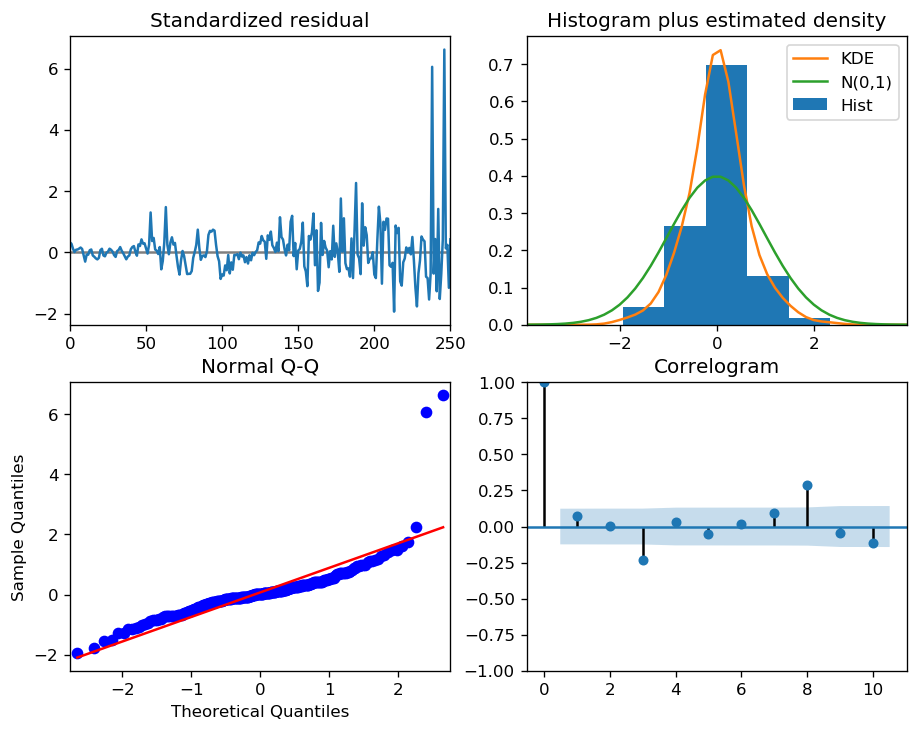

In [393]:
smodel.plot_diagnostics();